## Load Adult Census Dataset Using SHAP

https://docs.aws.amazon.com/sagemaker/latest/dg/ex1-preprocess-data.html

In [ ]:
conda install -c conda-forge shap

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::cudatoolkit==11.1.1=h6406543_9
  - pytorch/linux-64::pytorch==1.10.0=py3.8_cuda11.1_cudnn8.0.5_0
  - conda-forge/noarch::tqdm==4.62.3=pyhd8ed1ab_0
  - conda-forge/noarch::black==21.11b0=pyhd8ed1ab_0
  - conda-forge/noarch::dask-core==2021.11.2=pyhd8ed1ab_0
  - pytorch/linux-64::torch-model-archiver==0.5.0=py38_0
  - pytorch/linux-64::torch-workflow-archiver==0.2.0=py38_0
  - pytorch/linux-64::torchserve==0.5.0=py38_0
  - conda-forge/linux-64::watchdog==2.1.6=py38h578d9bd_1
  - conda-forge/linux-64::distributed==2021.11.2=py38h578d9bd_0
  - conda-forge/noarch::flask==2.0.2=pyhd8ed1ab_0
  - conda-forge/noarch::nbformat==5.1.3=pyhd8ed1ab_0
  - conda-forge/noarch::nltk==3.6.5=pyhd8ed1ab_0
  - conda-forge/noarch::pylint==2.11.1=pyhd8ed1ab_0
  - conda-forge/noarch::nbclient==0.5.9=pyhd8ed1ab_0
  - conda-forge/noarch:

## Load Adult Census Dataset Using SHAP

In [1]:
import shap
X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)
feature_names = list(X.columns)
feature_names

Matplotlib is building the font cache; this may take a moment.


['Age',
 'Workclass',
 'Education-Num',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital Gain',
 'Capital Loss',
 'Hours per week',
 'Country']

## Overview the Dataset

In [2]:
display(X.describe())

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581646,3.868892,10.080679,2.611836,6.572740,2.494518,3.665858,0.669205,1077.649170,87.303833,40.437454,36.718866
std,13.640442,1.455960,2.572562,1.506222,4.228857,1.758232,0.848806,0.470506,7385.911621,403.014771,12.347933,7.823782
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000
50%,37.000000,4.000000,10.000000,2.000000,7.000000,3.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000
75%,48.000000,4.000000,12.000000,4.000000,10.000000,4.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000
max,90.000000,8.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


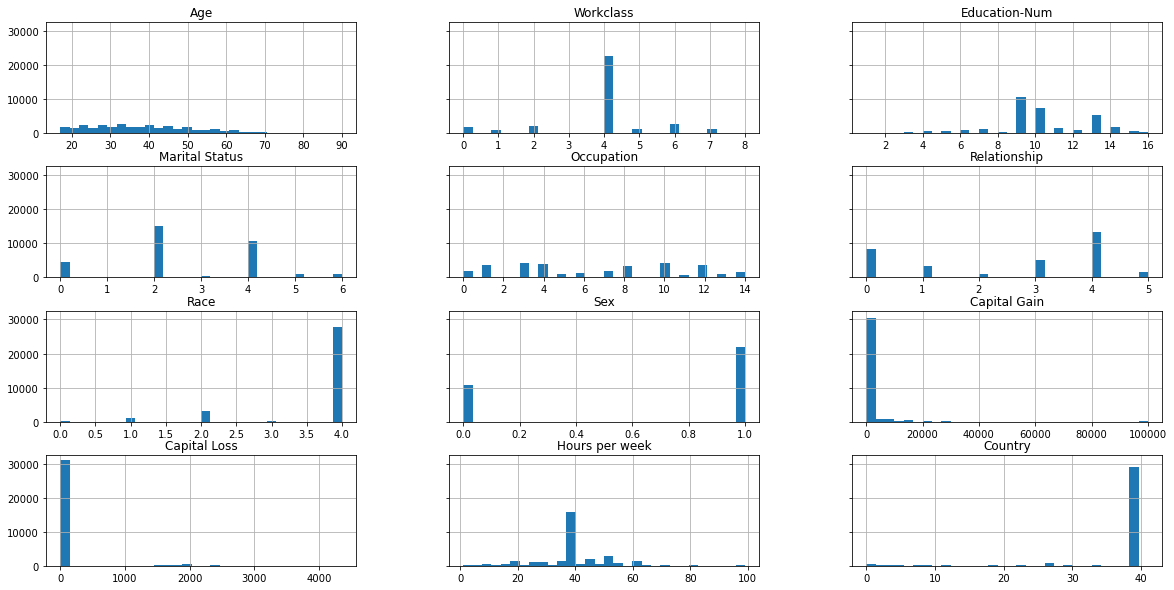

In [3]:
hist = X.hist(bins=30, sharey=True, figsize=(20, 10))

## Split the dataset into Train, Validation, and Test Datasets

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_display = X_display.loc[X_train.index]

In [5]:
print(X_train.index)

Int64Index([16465,  5625, 30273,  3136,  4521, 17457, 21029, 31775, 14744,
             5571,
            ...
            21440, 19279,  7813, 10955, 17289, 32511,  5192, 12172,   235,
            29733],
           dtype='int64', length=26048)


In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
X_train_display = X_display.loc[X_train.index]
X_val_display = X_display.loc[X_val.index]

In [7]:
import pandas as pd
train = pd.concat([pd.Series(y_train, index=X_train.index,
                             name='Income>50K', dtype=int), X_train], axis=1)
validation = pd.concat([pd.Series(y_val, index=X_val.index,
                            name='Income>50K', dtype=int), X_val], axis=1)
test = pd.concat([pd.Series(y_test, index=X_test.index,
                            name='Income>50K', dtype=int), X_test], axis=1)

In [8]:
train

,Income>50K,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
10911,1,47.0,4,9.0,2,3,4,4,1,0.0,0.0,40.0,39
17852,0,31.0,4,13.0,2,7,4,3,1,0.0,0.0,36.0,26
29165,1,32.0,4,10.0,2,13,5,4,0,0.0,0.0,32.0,39
30287,0,58.0,4,9.0,2,3,4,2,1,0.0,0.0,40.0,39
24019,0,17.0,4,6.0,4,6,3,4,1,0.0,0.0,20.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21168,0,43.0,4,8.0,2,14,4,4,1,0.0,0.0,40.0,39
6452,0,26.0,4,9.0,4,7,0,4,1,0.0,0.0,52.0,39
31352,0,32.0,7,14.0,2,10,4,4,1,0.0,0.0,50.0,39
6575,0,45.0,4,9.0,4,6,0,4,1,0.0,0.0,40.0,39


In [11]:
y_train

array([ True, False,  True, ..., False, False, False])

## Convert the Train and Validation Datasets to CSV Files

In [9]:
# Use 'csv' format to store the data
# The first column is expected to be the output column
train.to_csv('train.csv', index=False, header=False)
validation.to_csv('validation.csv', index=False, header=False)

## Upload the Datasets to Amazon S3


In [12]:
import sagemaker, boto3, os
bucket = sagemaker.Session().default_bucket()
prefix = "demo-sagemaker-xgboost-adult-income-prediction"

boto3.Session().resource('s3').Bucket(bucket).Object(
    os.path.join(prefix, 'data/train.csv')).upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(
    os.path.join(prefix, 'data/validation.csv')).upload_file('validation.csv')

In [13]:
print(bucket)

sagemaker-us-west-2-758804519739


In [15]:
!aws s3 ls {bucket}/{prefix}/data --recursive

2022-09-11 23:27:35     786285 demo-sagemaker-xgboost-adult-income-prediction/data/train.csv
2022-09-11 23:27:36     262122 demo-sagemaker-xgboost-adult-income-prediction/data/validation.csv
